In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'data/train'
data_test_path = 'data/test'
data_val_path = 'data/validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [42]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


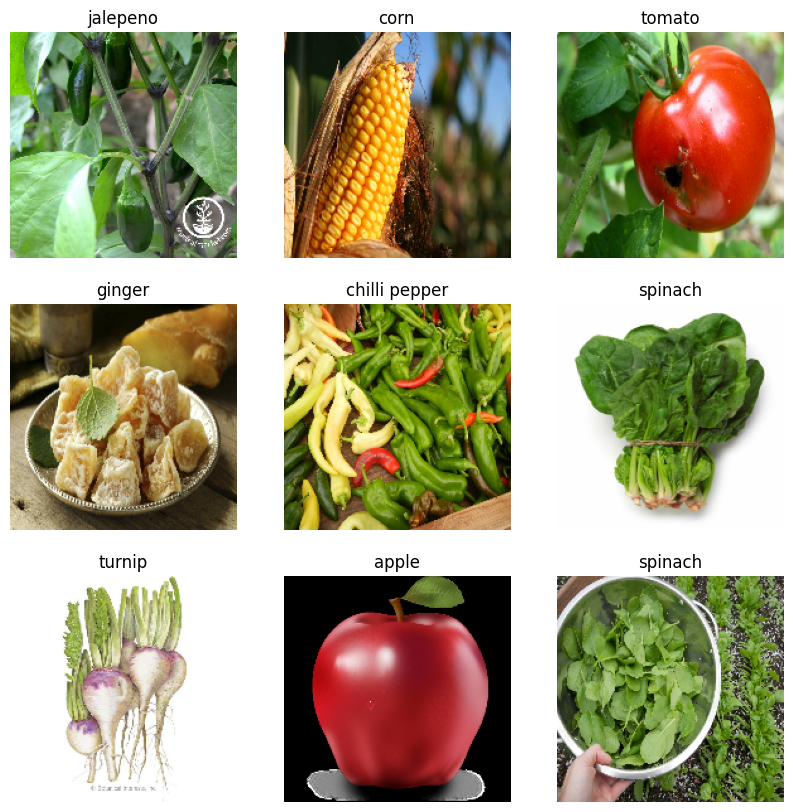

In [8]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
epochs_size = 25
model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 761ms/step - accuracy: 0.0765 - loss: 3.5178 - val_accuracy: 0.3818 - val_loss: 2.3163
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 769ms/step - accuracy: 0.2652 - loss: 2.5756 - val_accuracy: 0.5185 - val_loss: 1.7298
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 773ms/step - accuracy: 0.4418 - loss: 1.9361 - val_accuracy: 0.7749 - val_loss: 1.1134
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 766ms/step - accuracy: 0.6116 - loss: 1.3684 - val_accuracy: 0.8661 - val_loss: 0.6400
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 751ms/step - accuracy: 0.7732 - loss: 0.8129 - val_accuracy: 0.8974 - val_loss: 0.5945
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 754ms/step - accuracy: 0.8529 - loss: 0.5522 - val_accuracy: 0.9430 - val_loss: 0.3717
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 825ms/step - accuracy: 0.9051 - loss: 0.3867 - val_accuracy: 0.9316 - val_loss: 0.3750
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 763ms/step - accuracy: 0.9218 - loss: 0.3148 - val_accu

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, )

NameError: name 'history' is not defined

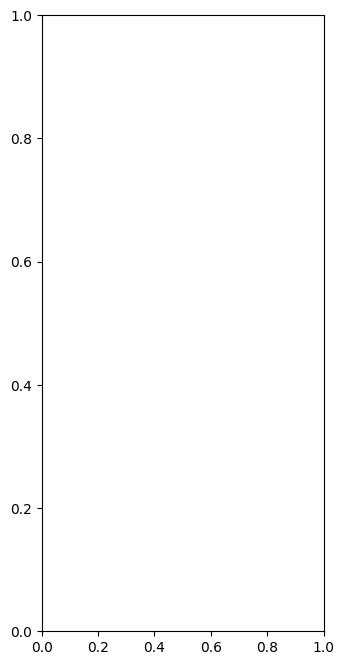

In [37]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [38]:
image = 'pepper.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [39]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [40]:
score = tf.nn.softmax(predict)

In [41]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is capsicum with accuracy of 92.47


In [36]:
model.save('Image_classify.keras')